In [29]:
#UPLOADING THE DATA
import pandas as pd
df=pd.read_csv("diabetes.csv",header=None)
h=['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','Diabetesfunc','Age','Outcome']
df.columns=h
df

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Diabetesfunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
#IMPORTING ALL THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [31]:
#description of data
df.describe()


,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,Diabetesfunc,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BP             768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Diabetesfunc   768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


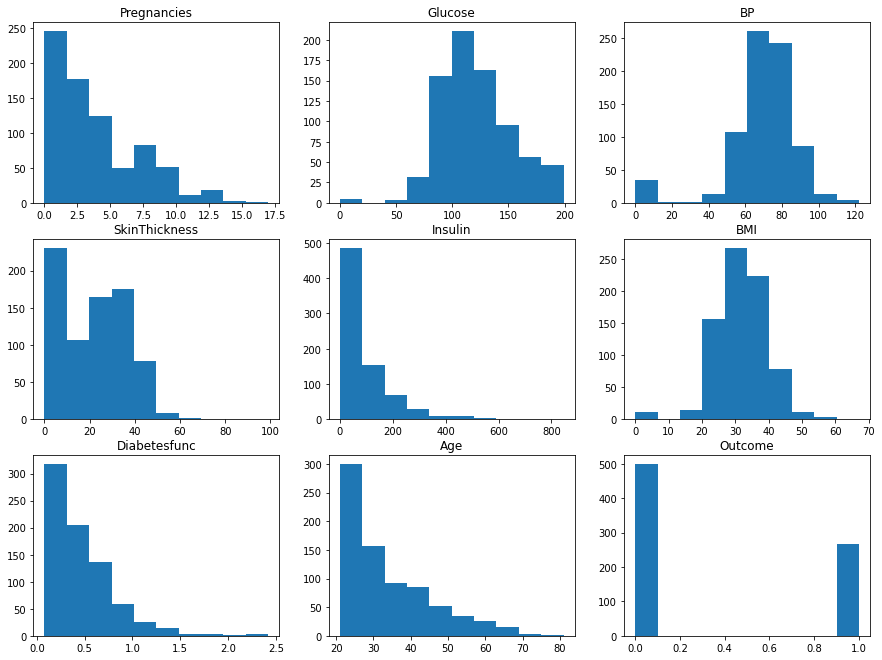

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,75))
for i in range(len(h)):
  plt.subplot(19,3,i+1)
  plt.hist(df[h[i]])
  plt.title(h[i])

In [34]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

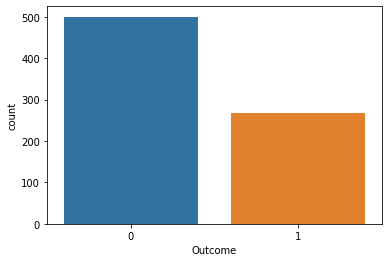

In [35]:
import seaborn as sns
sns.countplot(df['Outcome'])

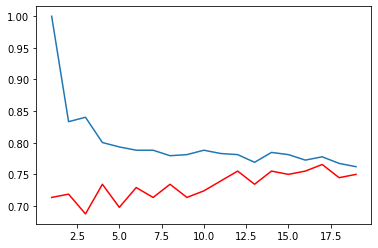

In [36]:
X=df.drop(['Outcome'],axis=1)
Y=df['Outcome']
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
ts=[]
tr=[]
for i in range(1,20):
  kmodel=KNeighborsClassifier(n_neighbors=i)
  xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=66)
  kmodel.fit(xtrain,ytrain)
  Yp_train=kmodel.predict(xtrain)
  Yp_test=kmodel.predict(xtest)
  tr.append(((ytrain==Yp_train).sum())/len(xtrain))
  ts.append(((ytest==Yp_test).sum())/len(xtest))
plt.plot(range(1,20),tr)
plt.plot(range(1,20),ts,color='red')




In [93]:
#Less difference at neighbors=11 is selected
X=df.drop(['Outcome'],axis=1)
Y=df['Outcome']
#KNN
from sklearn.neighbors import KNeighborsClassifier
kmodel=KNeighborsClassifier(n_neighbors=11)
kmodel.fit(X,Y)
Yp=kmodel.predict(X)
knn0=((Y==Yp).sum()/len(df))*100
((Y==Yp).sum()/len(df))*100
knn0



78.64583333333334

In [60]:
#linearregression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lmodel=LinearRegression()
lmodel.fit(X,Y)
Yp2=lmodel.predict(X)
from sklearn.metrics import mean_absolute_error
#print(mean_absolute_error(Y,Yp2))
linearreg0=(lmodel.score(xtrain,ytrain))*100
linearreg1=(lmodel.score(xtest,ytest))*100
print((lmodel.score(xtrain,ytrain))*100)
print((lmodel.score(xtest,ytest))*100)
lmodel.predict([[6,148,72,35,0,33.6,0.627,50]])
#plt.scatter(xtrain,ytrain,color="red")


30.149084824277296
29.938023318644312


array([0.65175729])

In [61]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
ypr=lgr.predict(xtrain)
from sklearn import metrics
cnf=metrics.confusion_matrix(ytrain,ypr)
print(cnf)
logisreg0=(lgr.score(xtrain,ytrain))*100
logisreg1=(lgr.score(xtest,ytest))*100
print(lgr.score(xtrain,ytrain))
#print(lgr.score(ypr,ytest))
print(lgr.score(xtest,ytest))
print("accuracy",metrics.accuracy_score(ytrain,ypr))
print("precision",metrics.precision_score(ytrain,ypr))
lgr.predict([[6,148,72,35,0,33.6,0.627,50]])

[[321  45]
 [ 87 123]]
0.7708333333333334
0.7916666666666666
accuracy 0.7708333333333334
precision 0.7321428571428571


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1])

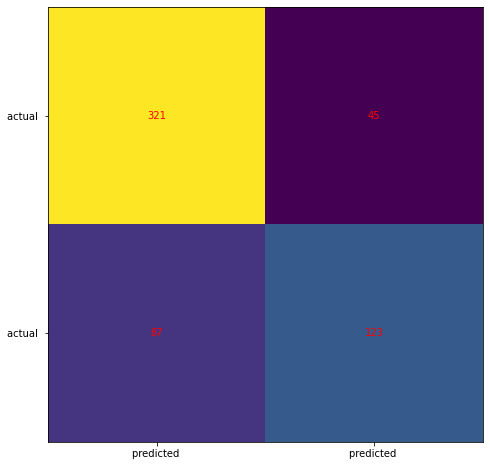

In [62]:
f,a=plt.subplots(figsize=(8,8))
a.imshow(cnf)
a.grid(False)
a.xaxis.set(ticks=(0,1),ticklabels=('predicted ','predicted '))
a.yaxis.set(ticks=(0,1),ticklabels=('actual ','actual '))
a.set_ylim(1.5,-0.5)
for i in range(2):
  for j in range(2):
    a.text(j,i,cnf[i,j],ha='center',va='center',color='red')
plt.show()

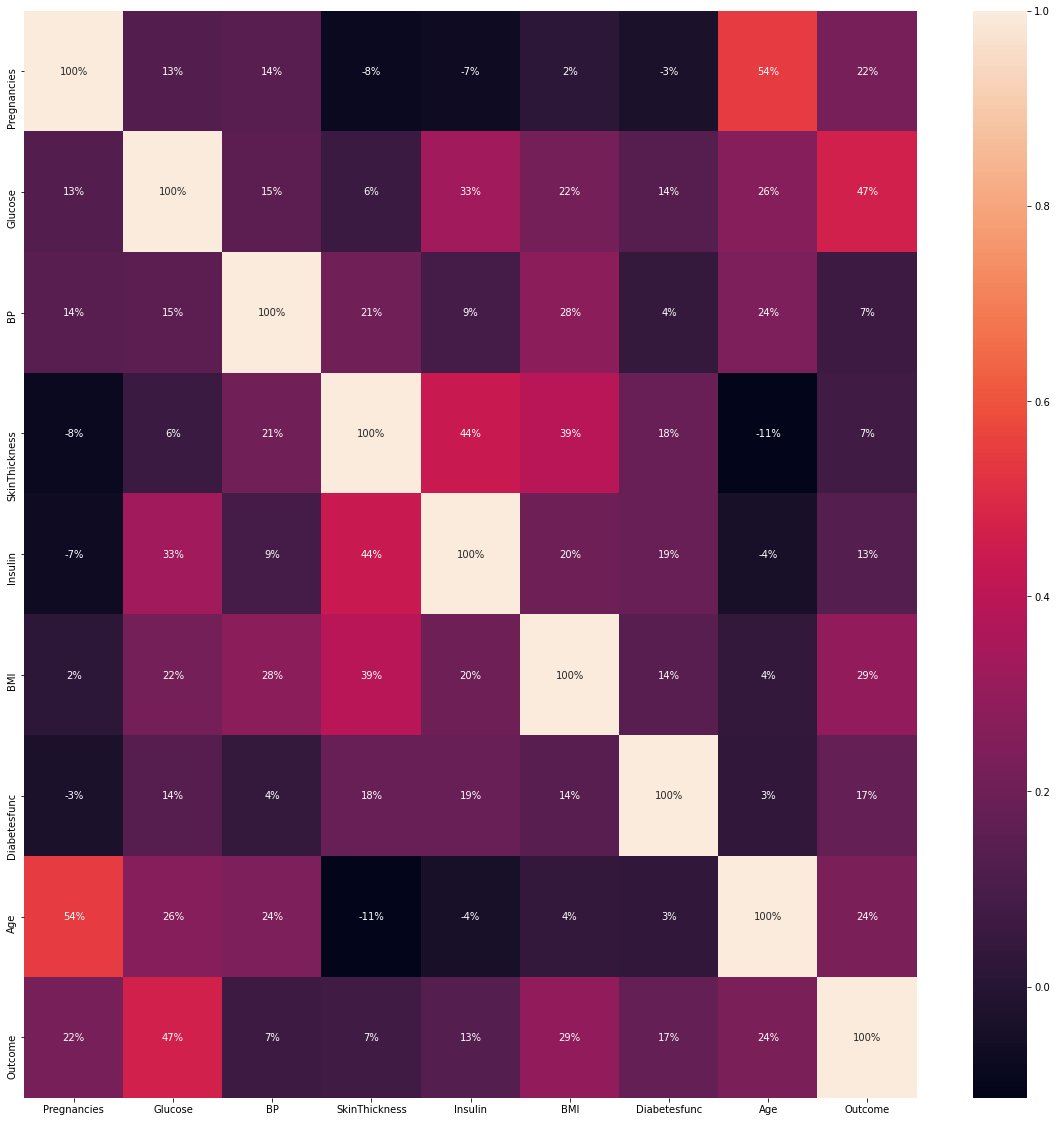

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot= True,fmt = '.0%')

In [64]:
from sklearn.metrics import classification_report
print(classification_report(ytrain,ypr))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       366
           1       0.73      0.59      0.65       210

    accuracy                           0.77       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.77      0.76       576



In [65]:
#PolynomialRegression
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=2)
x=pol.fit_transform(X)
xtrain0,xtest0,ytrain0,ytest0=train_test_split(x,Y,random_state=6)
lmodel_p=LinearRegression()
lmodel_p.fit(xtrain0,ytrain0)
ypredict=lmodel_p.predict(xtest0)
polreg0=(lmodel_p.score(xtest0,ytest0))*100
print((lmodel_p.score(xtest0,ytest0))*100)
#print(lmodel_p.score(,ytest0))




30.839095999153344


In [66]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
nmodel=RandomForestClassifier(n_estimators=8,max_features='auto',min_samples_split=4,min_samples_leaf=5)
nmodel.fit(xtrain,ytrain)
yp=nmodel.predict(xtrain)
print(mean_absolute_error(yp,ytrain))
random0=(nmodel.score(xtrain,ytrain))*100
random1=(nmodel.score(xtest,ytest))*100
print((nmodel.score(xtrain,ytrain))*100)
print((nmodel.score(xtest,ytest))*100)
nmodel.predict([[10,101,76,48,180,32.9,0.171,63]])


0.13368055555555555
86.63194444444444
78.64583333333334


array([0])

In [67]:
#DecicisonTree
from sklearn.tree import DecisionTreeClassifier
dmodel= DecisionTreeClassifier(max_depth=2)
dmodel.fit(xtrain,ytrain)
yp1=dmodel.predict(xtrain)
print(mean_absolute_error(yp1,ytrain))
decision0=(dmodel.score(xtrain,ytrain))*100
decision1=(dmodel.score(xtest,ytest))*100
print((dmodel.score(xtrain,ytrain))*100)
print((dmodel.score(xtest,ytest))*100)
dmodel.predict([[10,101,76,48,180,32.9,0.171,63]])



0.265625
73.4375
76.5625


array([0])

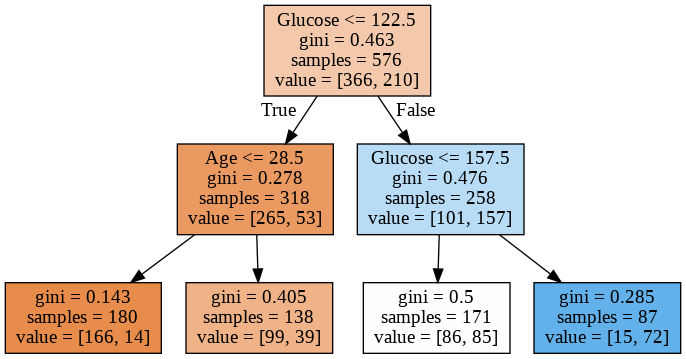

In [68]:
from sklearn.tree import export_graphviz
dot_data=export_graphviz(dmodel,out_file=None,feature_names=xtrain.columns,filled=True)
from IPython.display import Image
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


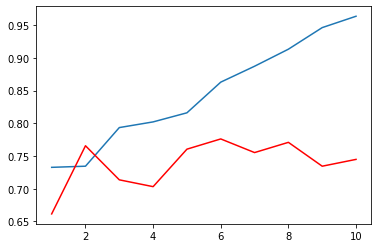

In [69]:
tra=[]
tsa=[]
for i in range(1,11):
  dmodel1= DecisionTreeClassifier(max_depth=i)
  dmodel1.fit(xtrain,ytrain)
  yp2=dmodel.predict(xtrain)
  tra.append(dmodel1.score(xtrain,ytrain))
  tsa.append(dmodel1.score(xtest,ytest))
plt.plot(range(1,11),tra)
plt.plot(range(1,11),tsa,c="red")
plt.show()

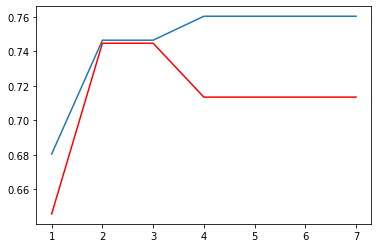

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#X_sc=sc.fit_transform(X)
trac=[]
tsac=[]
for i in range(1,8):
  pca=PCA(n_components=i)
  xpca=pca.fit_transform(X)
  xtrain1,xtest1,ytrain1,ytest1=train_test_split(xpca,Y,random_state=40)
  dmodel2= DecisionTreeClassifier(max_depth=2)
  dmodel2.fit(xtrain1,ytrain1)
  yp3=dmodel2.predict(xtrain1)
  trac.append(dmodel2.score(xtrain1,ytrain1))
  tsac.append(dmodel2.score(xtest1,ytest1))
plt.plot(range(1,8),trac)
plt.plot(range(1,8),tsac,c="red")
plt.show()

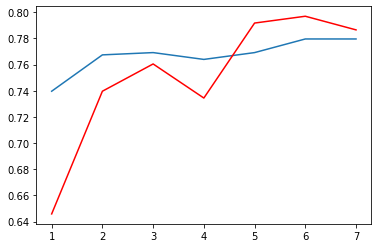

In [71]:
from sklearn.decomposition import PCA
etr=[]
ets=[]
for i in range(1,8):
  pca0=PCA(n_components=i)
  xpca0=pca0.fit_transform(X)
  x_train1,x_test1,y_train1,y_test1=train_test_split(xpca0,Y,random_state=6)
  knn= KNeighborsClassifier(n_neighbors=11)
  knn.fit(x_train1,y_train1)
  yk=knn.predict(x_train1)
  etr.append(knn.score(x_train1,y_train1))
  ets.append(knn.score(x_test1,y_test1))
plt.plot(range(1,8),etr)
plt.plot(range(1,8),ets,c="red")
plt.show()

In [72]:
pca1=PCA(n_components=3)
xpca1=pca1.fit_transform(X)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(xpca1,Y,random_state=40)
dmodel3= DecisionTreeClassifier(max_depth=2)
dmodel3.fit(xtrain2,ytrain2)
yp4=dmodel3.predict(xtrain2)
pcat0=(dmodel3.score(xtrain2,ytrain2))*100
pcat1=(dmodel3.score(xtest2,ytest2))*100
print((dmodel3.score(xtrain2,ytrain2))*100)
print((dmodel3.score(xtest2,ytest2))*100)

74.65277777777779
74.47916666666666


In [73]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
xtrain3,xtest3,ytrain3,ytest3=train_test_split(X,Y,test_size=0.45,random_state=6)
gnb.fit(xtrain3,ytrain3)
y_predict=gnb.predict(xtest3)
naive0=metrics.accuracy_score(ytest3,y_predict)*100
print(metrics.accuracy_score(ytest3,y_predict)*100)

76.01156069364163


In [74]:
#Standardscaler with mlp classifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
xtrain4,xtest4,ytrain4,ytest4=train_test_split(X,Y,test_size=0.2,random_state=21)
sc=StandardScaler()
X_str=sc.fit_transform(xtrain4)
x_sts=sc.fit_transform(xtest4)
mlp=MLPClassifier(random_state=0,alpha=1,max_iter=100)
mlp.fit(X_str,ytrain4)
mlp.fit(x_sts,ytest4)
mlp0=(mlp.score(X_str,ytrain4))*100
mlp1=(mlp.score(x_sts,ytest4))*100
print((mlp.score(X_str,ytrain4))*100)
print((mlp.score(x_sts,ytest4))*100)


78.33876221498372
81.81818181818183


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


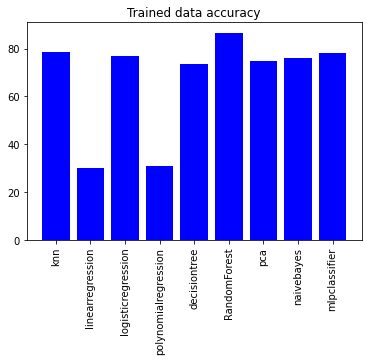

In [95]:
xlabel=['knn','linearregression','logisticregression','polynomialregression','decisiontree','RandomForest','pca','naivebayes','mlpclassifier']
ylabel0=[knn0,linearreg0,logisreg0,polreg0,decision0,random0,pcat0,naive0,mlp0]
ylabel1=[knn0,linearreg1,logisreg1,polreg0,decision1,random1,pcat1,naive0,mlp1]
#plt.figure(figsize=(12,10))
plt.title("Trained data accuracy")
plt.xticks(rotation=90)
plt.bar(xlabel,ylabel0,color="blue")
plt.show()


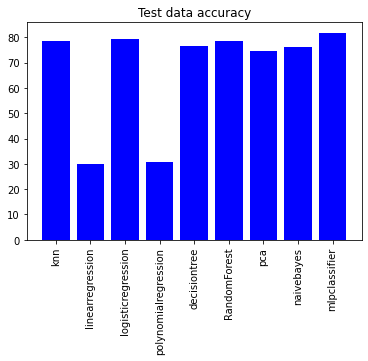

In [96]:
plt.title("Test data accuracy")
plt.xticks(rotation=90)
plt.bar(xlabel,ylabel1,color="blue")
plt.show()

In [101]:
for i in range(len(xlabel)):
  print(xlabel[i],":-- ",ylabel0[i]," ",ylabel1[i])

knn :--  78.64583333333334   78.64583333333334
linearregression :--  30.149084824277296   29.938023318644312
logisticregression :--  77.08333333333334   79.16666666666666
polynomialregression :--  30.839095999153344   30.839095999153344
decisiontree :--  73.4375   76.5625
RandomForest :--  86.63194444444444   78.64583333333334
pca :--  74.65277777777779   74.47916666666666
naivebayes :--  76.01156069364163   76.01156069364163
mlpclassifier :--  78.33876221498372   81.81818181818183
